In [ ]:
""" goals:
1. hand build primitives in a new model
2. score tasks in this new grammar.
3. train this model without learning new dsl
"""


In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")


In [2]:

from dreamcoder.domains.draw.drawPrimitivesDraw import *
from dreamcoder.program import Invented
# from dreamcoder

In [339]:
## Checking whether adding simple primitive, no holes, helps [sanity check]
from dreamcoder.domains.draw.drawPrimitivesDraw import *
from dreamcoder.program import Invented

old_primitives = primitives
extra_primitives = [
    Primitive("(lambda (connect line circle))", tstroke, Invented(Abstraction(Program.parse("(connect line circle)")))),
#     Primitive("test2", tstroke, Invented(Abstraction(Program.parse("(connect line (connect line (connect circle line)))")))),
#     Primitive("test3", tstroke, Program.parse("(connect line circle)")),
]

new_primitives = old_primitives + extra_primitives


# 1) get grammars
g0 = Grammar.uniform(old_primitives)
g1 = Grammar.uniform(new_primitives)

# s = "(connect line (connect circle line))"
s = "(connect line circle)"
print(g0.logLikelihood(tstroke, Program.parse(s)))
print(g1.logLikelihood(tstroke, Program.parse(s)))

# s = "(connect line (connect circle line))"
# s = "(test)"
# print(g0.logLikelihood(tstroke, Program.parse(s)))
p =  Program.parse("(lambda (connect line circle))")
# p = Program.parse("(test)")
print(g1.logLikelihood(tstroke, p))

print(g0.logLikelihood(tstroke, Invented(Abstraction(Program.parse(s)))))

connect
emptystroke
line
circle
transform
reflect
connect
repeat
line
emptystroke
line
circle
transform
reflect
connect
repeat
circle
emptystroke
line
circle
transform
reflect
connect
repeat
-5.8377304471659395
connect
emptystroke
line
circle
transform
reflect
connect
repeat
(lambda (connect line circle))
line
emptystroke
line
circle
transform
reflect
connect
repeat
(lambda (connect line circle))
circle
emptystroke
line
circle
transform
reflect
connect
repeat
(lambda (connect line circle))
-6.238324625039507
(lambda (connect line circle))
emptystroke
line
circle
transform
reflect
connect
repeat
(lambda (connect line circle))


(lambda (connect line circle)) Not in candidates
Candidates is {emptystroke: (0.0, tstroke, Context(next = 0, {})), line: (0.0, tstroke, Context(next = 0, {})), circle: (0.0, tstroke, Context(next = 0, {})), transform: (0.0, tstroke -> ttransmat -> tstroke, Context(next = 0, {})), reflect: (0.0, tstroke -> tangle -> tstroke, Context(next = 0, {})), connect: (0.0, tstroke -> tstroke -> tstroke, Context(next = 0, {})), repeat: (0.0, tstroke -> trep -> ttransmat -> tstroke, Context(next = 0, {})), (lambda (connect line circle)): (0.0, tstroke, Context(next = 0, {}))}
request is tstroke
xs []
environment []


AssertionError: 

In [346]:
##  emialt o kevin
from dreamcoder.domains.draw.drawPrimitivesDraw import *
from dreamcoder.program import Invented

old_primitives = primitives
extra_primitives = [
    Primitive("test", tstroke, Invented(Abstraction(Program.parse("(connect line circle)")))),
]

new_primitives = old_primitives + extra_primitives

g0 = Grammar.uniform(old_primitives)
g1 = Grammar.uniform(new_primitives)

s = "(test)"
# print(g0.logLikelihood(tstroke, Program.parse(s)))
# print(g1.logLikelihood(tstroke, Program.parse(s)))
print(g1.logLikelihood(tstroke, (Program.parse(s))))

-2.0794415416798357


TypeError: 'Primitive' object is not iterable

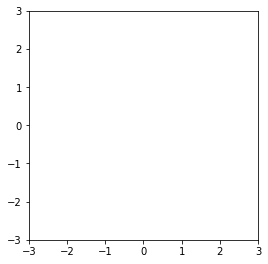

In [333]:
p = Program.parse("(test)")
plot(p)

In [325]:
p = Invented(Abstraction(Program.parse("(connect line circle)")))
p

#(lambda (connect line circle))

test2


TypeError: 'Invented' object is not iterable

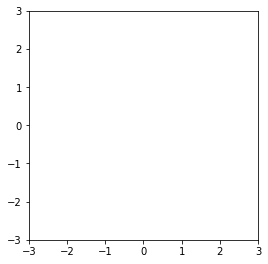

In [299]:
p = g1.sample(tstroke)
print(p)
plot(p.runWithArguments([]))

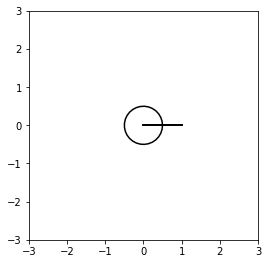

In [300]:
plot(p.runWithArguments([]).evaluate([])([]))

In [290]:
p.runWithArguments([]).evaluate([])([])

AttributeError: 'list' object has no attribute 'evaluate'

In [217]:
p = Invented(Program.parseHumanReadable("(lambda (k) (connect (k) circle))"))

TypeError: annotateTypes() missing 2 required positional arguments: 'context' and 'environment'

In [3]:
## Checking whether adding primitive with holes helps

old_primitives = primitives
extra_primitives = [
    Primitive("test", arrow(tstroke, tstroke), Invented(Program.parseHumanReadable("(lambda (k) (connect (k) circle))"))),
]

new_primitives = old_primitives + extra_primitives


# 1) get grammars
g0 = Grammar.uniform(old_primitives)
g1 = Grammar.uniform(new_primitives)

# s = "(connect line (connect circle line))"
s = "(connect line circle)"
print(g0.logLikelihood(tstroke, Program.parse(s)))
print(g1.logLikelihood(tstroke, Program.parse(s)))


[tstroke, tstroke]
tstroke -> tstroke -> tstroke
Context(next = 0, {})
[]
tstroke
Context(next = 0, {})
[]
tstroke
Context(next = 0, {})
-5.8377304471659395
[tstroke, tstroke]
tstroke -> tstroke -> tstroke
Context(next = 0, {})
[]
tstroke
Context(next = 0, {})
[]
tstroke
Context(next = 0, {})
-6.238324625039507


In [35]:
## [IMPORTANT] NOT SURE WHY THIS DOESNT WORK. why can't get log likeli for the program given that I have given
# that program already as a primitive.

old_primitives = primitives
extra_primitives = [
    Primitive("#(lambda (connect $0 circle))", arrow(tstroke, tstroke), Invented(Program.parseHumanReadable("(lambda (k) (connect (k) circle))"))),
]

new_primitives = old_primitives + extra_primitives


# 1) get grammars
g1 = Grammar.uniform(new_primitives)


## get likeli for a program with holes
s = "(lambda (x) (connect (x) circle))"
p = Invented(Program.parseHumanReadable(s))
# p = Program.parseHumanReadable(s)

# BOTH OF these dont work..
print(g1.logLikelihood(tstroke, p))
print(g1.logLikelihood(arrow(tstroke, tstroke), p))

#(lambda (connect $0 circle))
emptystroke
line
circle
transform
reflect
connect
repeat
#(lambda (connect $0 circle))
False


#(lambda (connect $0 circle)) Not in candidates
Candidates is {emptystroke: (0.0, tstroke, Context(next = 0, {})), line: (0.0, tstroke, Context(next = 0, {})), circle: (0.0, tstroke, Context(next = 0, {})), transform: (0.0, tstroke -> ttransmat -> tstroke, Context(next = 0, {})), reflect: (0.0, tstroke -> tangle -> tstroke, Context(next = 0, {})), connect: (0.0, tstroke -> tstroke -> tstroke, Context(next = 0, {})), repeat: (0.0, tstroke -> trep -> ttransmat -> tstroke, Context(next = 0, {})), #(lambda (connect $0 circle)): (0.0, tstroke -> tstroke, Context(next = 0, {}))}
request is tstroke
xs []
environment []


AssertionError: 

In [ ]:
## [IMPORTANT] THIS WALKS THROUGH GET LL FOR AN ABSTRACTION
## TRYING TO UNDERSTAND HOW CONTEXT AND ENVIRONMENT WORK.

old_primitives = primitives
extra_primitives = [
    Primitive("#(lambda (connect $0 circle))", arrow(tstroke, tstroke), Invented(Program.parseHumanReadable("(lambda (k) (connect (k) circle))"))),
]

new_primitives = old_primitives + extra_primitives


# 1) get grammars
g1 = Grammar.uniform(new_primitives)


## get likeli for a program with holes
s = "(lambda (x) (connect (x) circle))"
# p = Invented(Program.parseHumanReadable(s))
p = Program.parseHumanReadable(s)

# BOTH OF these dont work..
# print(g1.logLikelihood(tstroke, p))
print(g1.logLikelihood(arrow(tstroke, tstroke), p))

In [139]:
## WALKING THROUGH SAMPLING


g1.sample(request=arrow(arrow(tstroke, tstroke), tstroke), maximumDepth=5)

# g1._sample(request=tstroke, context=[tstroke], environment=[], maximumDepth=2)

(lambda (reflect emptystroke angle4))

In [45]:
##  SCRATCH NOTES.
arrow(arrow(tstroke, tstroke), tstroke).returns()

from dreamcoder.frontier import *
from dreamcoder.program import *
from dreamcoder.type import *
from dreamcoder.utilities import *
Context

<class 'dreamcoder.program.Abstraction'>
--
context: Context(next = 0, {})
env: []
reqyest: tstroke -> tstroke
[tstroke, tstroke]
(connect $0 circle)
-6.591673732008658


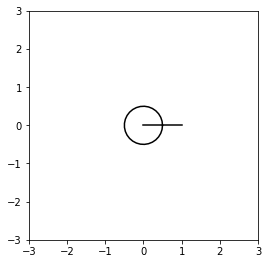

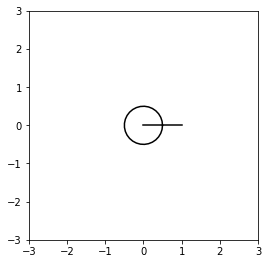

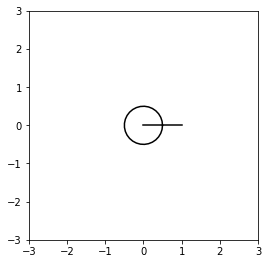

In [6]:
# How to encode programs and evaluate them

p = Program.parseHumanReadable("(connect line circle)")
plot(p.runWithArguments([]))

p = Program.parseHumanReadable("(lambda (k) (connect (k) circle))")
plot(p.runWithArguments([primitives[3].evaluate([])]))

p = Program.parseHumanReadable("(lambda (k) (lambda (l) (connect (k) (l))))")
plot(p.runWithArguments([primitives[3].evaluate([]), primitives[4].evaluate([])]))

In [ ]:
p = Program.parse("(#(lambda (transmat None None ( $0) None None)))")

In [192]:
# THREE WAYS TO WRITE SAME THING

p1 = Invented(Abstraction(Program.parse("(connect line circle)")))

p2 = Program.parse("#(lambda (connect line circle))")

p3 = Invented(Program.parseHumanReadable("(lambda (k) (connect line circle))"))

p4 = Invented(Abstraction(Program.parseHumanReadable("(connect line circle)")))

assert p1==p2
assert p2==p3
assert p3==p4

In [166]:
# THREE WAYS TO WRITE SAME THING [INCLUDING HOLES]

# p1 = Invented(Abstraction(Program.parse("(connect line circle)")))

p2 = Program.parse("#(lambda (lambda (connect $1 $0)))")
p3 = Invented(Program.parseHumanReadable("(lambda (k) (lambda (l) (connect (k) (l))))"))


# p4 = Invented(Abstraction(Program.parseHumanReadable("(connect line circle)")))

# assert p1==p2
assert p2==p3
# assert p3==p4

In [169]:
g.logLikelihood(tstroke, Program.parse("(connect line (connect circle line))"))

-9.729550745276565

In [ ]:

## for hand building generative model (e.g., the ground truth model)

(lambda (vline x y z) (connect vline (connect (transform x .... (connect y (connect z)))))

Program.parseHumanReadable("(lambda (connect x y z) (connect x (connect y (connect z))))")
(lambda (lambda (lambda (lambda ($3 $2 ($3 $1 ($3 $0)))))))

p = Invented(Program.parseHR(...))



g = Grammar.uniform(primitives+[p])


1. run on test tasks
2. run on traiing?

======================
getting prior score.






In [182]:
Program.parseHumanReadable("(lambda (connect x y z) (connect x (connect y (connect z))))")
# (lambda (lambda (lambda (lambda ($3 $2 ($3 $1 ($3 $0)))))))


(lambda (lambda (lambda (lambda ($3 $2 ($3 $1 ($3 $0)))))))

In [ ]:
Invented(Abstraction(...))


In [ ]:
# to score
p = Program.parse("(connect circle line)")
g.logLikehood(<type>, p)
